In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sb
import scipy.stats as stats
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from linear_regression import myplot

In [14]:
np.random.seed(1)

T = 10000
p = 2
q = 1
Qfit=1
Q = np.eye(q)
R = np.array([3,9]) # 3,9
C = np.array([[1,1]]).reshape(p,1) #np.abs(np.random.randn(p, q))

x = np.random.randn(T,q).dot(np.sqrt(Q)).T
y = C.dot(x)+(np.random.randn(p*T).reshape(p, T).T*np.sqrt(R)).T

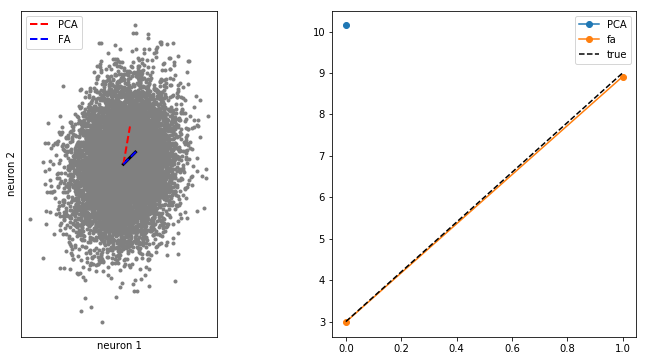

In [15]:
np.random.seed(1)

fig, ax, _ = myplot(Nplots=2)
ax[0].plot(y[0,:], y[1,:], '.k',color='grey')
ax[0].set_aspect(1);

#fig, ax, _ = myplot(Nplots=2)
Ctmp = C # (C.T*np.sqrt(R)).T
ax[0].plot([0, Ctmp[0, 0]],[0,Ctmp[1,0]], '-', color='black',linewidth=3)
if q>1: ax[0].plot([0, Ctmp[0, 1]],[0,Ctmp[1,1]], '-',color='black', linewidth=3)
ax[1].plot()

# PCA
pca = PCA(n_components=Qfit)
ystand = StandardScaler().fit_transform(y.T)
pca.fit(y.T)
scalvar = -np.sqrt(pca.explained_variance_)
ax[0].plot([0, pca.components_[0, 0]*scalvar[0]], 
         [0,pca.components_[0, 1]*scalvar[0]], '--r', label='PCA',linewidth=2)
if Qfit>1: 
    ax[0].plot([0, pca.components_[1, 0]*scalvar[1]], 
         [0,pca.components_[1, 1]*scalvar[1]], '--r',linewidth=2)
ax[1].plot(np.sort(pca.explained_variance_), 'o-', label='PCA')
#ax[1].set_ylim(0, 1)

# FA
fa = FactorAnalysis(n_components=Qfit, noise_variance_init=R)
fa.fit(y.T)
comp = -fa.components_#*np.sqrt(fa.noise_variance_)
ax[0].plot([0, comp[0, 0]], 
         [0,comp[0, 1]], '--b', label='FA',linewidth=2)
if Qfit>1: 
    ax[0].plot([0, comp[1, 0]], 
         [0,comp[1, 1]], '--b',linewidth=2)

ax[0].legend()
ax[0].set_xlabel('neuron 1')
ax[0].set_ylabel('neuron 2')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].plot(fa.noise_variance_, 'o-', label='fa')
ax[1].plot(R, '--k', label='true')
ax[1].legend()

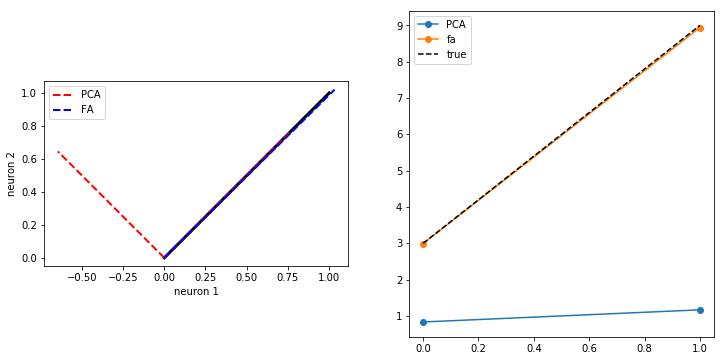

In [279]:
np.random.seed(1)

fig, ax, _ = myplot(Nplots=2)
ax[0].set_aspect(1);

#fig, ax, _ = myplot(Nplots=2)
Ctmp = C # (C.T*np.sqrt(R)).T
ax[0].plot([0, Ctmp[0, 0]],[0,Ctmp[1,0]], '-', color='black',linewidth=3)
if q>1: ax[0].plot([0, Ctmp[0, 1]],[0,Ctmp[1,1]], '-',color='black', linewidth=3)
ax[1].plot()

# PCA
pca = PCA(n_components=Qfit)
ystand = StandardScaler().fit_transform(y.T)
pca.fit(ystand)
scalvar = -np.sqrt(pca.explained_variance_)
ax[0].plot([0, pca.components_[0, 0]*scalvar[0]], 
         [0,pca.components_[0, 1]*scalvar[0]], '--r', label='PCA',linewidth=2)
if Qfit>1: 
    ax[0].plot([0, pca.components_[1, 0]*scalvar[1]], 
         [0,pca.components_[1, 1]*scalvar[1]], '--r',linewidth=2)
ax[1].plot(np.sort(pca.explained_variance_), 'o-', label='PCA')
#ax[1].set_ylim(0, 1)

# FA
fa = FactorAnalysis(n_components=Qfit, noise_variance_init=R)
fa.fit(y.T)
comp = -fa.components_#*np.sqrt(fa.noise_variance_)
ax[0].plot([0, comp[0, 0]], 
         [0,comp[0, 1]], '--b', label='FA',linewidth=2)
if Qfit>1: 
    ax[0].plot([0, comp[1, 0]], 
         [0,comp[1, 1]], '--b',linewidth=2)

ax[0].legend()
ax[0].set_xlabel('neuron 1')
ax[0].set_ylabel('neuron 2')

ax[1].plot(fa.noise_variance_, 'o-', label='FA')
ax[1].plot(R, '--k', label='true')
ax[1].legend()